# Python实验报告5--参考答案

<font face='kaiti' size=5 style='line-height:1.5'>

要求：
1. 在文件开头部分填写自己的信息；
2. 在每个题下方的代码块中书写该题的代码，并运行出结果；
3. 在2节课的时间内完成前7个题；打印为pdf文件并提交，文件名改为“Python实验5+班级姓名.pdf”。

<font face='kaiti' size=5 style='line-height:1.5'>
    
实验目的：

- 掌握Numpy中数组的创建方法及常用操作函数或方法。
- 能恰当使用Numpy数组解决简单的问题。

<font face='kaiti' size=5 style='line-height:1.8'>

1. 用尽可能简单的numpy命令生成下面的数组。

$x1 = [1.2, 0.8, 0.4, 0.0, -0.4, -0.8, -1.2, -1.6]$  
$x2 = \begin{bmatrix}0.1&0.4&0.7&1.0&1.3\\1.6&1.9&2.2&2.5&2.8\end{bmatrix}\qquad x3=\begin{bmatrix}0&0&1&1\\0&0&1&1\end{bmatrix}$  
$x4=\begin{bmatrix}
1 & 5 & 9 & -1\\ 2 & 6 & -1 & 14\\ 3 & -1 & 11 & 15\\ -1 & 8 & 12 & 16\end{bmatrix}\qquad
x5 = \begin{bmatrix}5&1&1&1\\2&5&2&2\\3&3&5&3\\4&4&4&5\end{bmatrix}$

In [32]:
import numpy as np

x1 = np.linspace(1.2, -1.6, 8)
print('x1=\n',x1)
x2 = np.linspace(0.1,2.8,10).reshape((2,-1))
print('x2=\n',x2)
x3 = np.c_[np.zeros([2,2]),np.ones([2,2])]
# x3 = np.array([np.zeros(4), np.ones(4)])
print('x3=\n',x3)

x1=
 [ 1.2  0.8  0.4  0.  -0.4 -0.8 -1.2 -1.6]
x2=
 [[0.1 0.4 0.7 1.  1.3]
 [1.6 1.9 2.2 2.5 2.8]]
x3=
 [[0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [33]:
x4 = np.arange(1,17).reshape((4,4),order='f')
x4[range(4), range(3,-1,-1)]=-1  # x4 = x4 - np.fliplr(np.diag([14,11,8,5]))
print('x4=\n',x4)
x5 = np.arange(1,5).reshape((4,1)) * np.ones(4)  # 利用广播机制
x5[range(4),range(4)]=5 # x5 = x5 + np.diag([4,3,2,1])
print('x5=\n',x5)

x4=
 [[ 1  5  9 -1]
 [ 2  6 -1 14]
 [ 3 -1 11 15]
 [-1  8 12 16]]
x5=
 [[5. 1. 1. 1.]
 [2. 5. 2. 2.]
 [3. 3. 5. 3.]
 [4. 4. 4. 5.]]


<font face='kaiti' size=5 style='line-height:1.5'>

2. 利用Numpy数组求级数和  
(1) $s1 = \displaystyle \sum_{n=1}^{100}(-1)^{n+1}\frac1n \qquad\qquad$   (2) $s2 = \displaystyle\sum_{n=1}^{100}\dfrac{n}{6^n}.$

In [1]:
import numpy as np

n = np.arange(1,101)
s1 = np.sum((-1)**(n+1)/n)
s2 = np.sum(n/6.**n)
s1, s2

(0.6881721793101955, 0.23999999999999996)

In [2]:
# 注：第2个级数和，如果分母部分的运算不使用浮点数，则结果不正确
n = np.arange(1,101)
s2 = np.sum(n/6**n)
s2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12320\718592427.py:2: RuntimeWarning: divide by zero encountered in divide
  s2 = np.sum(n/6**n)


inf

In [3]:
# 以上出现“被零除”的警告，且结果不正确，是因为整数6的高次方溢出
# 其值变成了0，故在numpy中应避免出现整数的高次方
6**n

array([          6,          36,         216,        1296,        7776,
             46656,      279936,     1679616,    10077696,    60466176,
         362797056, -2118184960,   175792128,  1054752768,  2033549312,
        -683606016,   193331200,  1159987200, -1630011392, -1190133760,
        1449132032,   104857600,   629145600,  -520093696,  1174405120,
       -1543503872,  -671088640,   268435456,  1610612736,  1073741824,
       -2147483648,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,
                 0,           0,           0,           0,      

In [7]:
import numpy as np

n = np.linspace(1,100,100) # linspace产生的数组的数据类型是浮点数
s2 = np.sum(n/6**n)
s2

0.23999999999999996

<font face='kaiti' size=5 style='line-height:1.8'>
    
3. 已知下列的矩阵 $M=\begin{bmatrix}7&5&13&10\\1&9&15&11\\2&8&4&3\\12&14&16&6\end{bmatrix}$.

(1) $b=[6,-5,-5,-16]^T$，求 $x$，使$Mx=b$；  
(2) 求一组权值，使矩阵$M$各行的加权和等于$[0, 24, 78, 70]$。  

<font size=4 style='line-height:1.5'>

&emsp;问题（2）可以理解为求一组权值x，使 x*M=w ，这里 w=[0,24,78,70]。两边转置 $M^Tx^T=w^T$，即可变为通常的线性方程组的求解问题.

In [34]:
import numpy as np

M = np.array([[7, 5, 13, 10], [1, 9, 15, 11], [2, 8, 4, 3], [12, 14, 16, 6]])
# (1)
b = np.array([6, -5, -5, -16])
x = np.linalg.solve(M, b)
print('方程的解为：', x)

方程的解为： [ 1. -1. -2.  3.]


In [35]:
# (2) x*M=w
w = np.array([0, 24, 78, 70])
x1 = np.linalg.solve(M.T, w)
print('权值为：', x1)

权值为： [ 3.  5. -1. -2.]


<font face='kaiti' size=5 style='line-height:1.8'>

4. 使用Numpy产生一个服从正态分布 $N(2, 3^2)$ 的大小为 $6\times 6$的随机数组 $N$，  
（1）将其各列元素除以各列元素的平方和的平方根，产生矩阵$N1$，即$N1$的各列为单位向量；  
（2）将$N$的各列元素减去各列的最小值，然后除以各列的 (最大值-最小值)，产生矩阵$N2$；即$N2$各列元素的范围将归一化到[0,1]上。

In [36]:
import numpy as np

N = np.random.randn(6,6)*3 + 2
# N = np.random.normal(2,3,(6,6)) # 与上面的等价
# (1)
N1 = N/np.sqrt(np.sum(N**2, axis=0))
print('N1=\n',N1)
print('N1各列的平方和为：',np.sum(N1**2, axis=0)) # 验证各列是否为单位向量

N1=
 [[ 0.7642094  -0.35670676 -0.44744264  0.36858917  0.35376589 -0.12969676]
 [ 0.33779577 -0.219164    0.3720884   0.70940565  0.35765768  0.55402548]
 [ 0.2288777  -0.25168129  0.01586201  0.12380559  0.26457999  0.09660016]
 [ 0.05287679  0.42360608  0.43400825  0.56890825  0.4449026   0.52329734]
 [-0.05822841  0.01668221  0.68755219 -0.13820814  0.67712824  0.45273409]
 [ 0.49326109  0.7626687  -0.00159074 -0.05291253  0.14313329  0.43369882]]
N1各列的平方和为： [1. 1. 1. 1. 1. 1.]


In [37]:
# (2)
N2 = (N-N.min(axis=0))/(N.max(axis=0)-N.min(axis=0))
print('N2=\n',N2)
print('N2各列的最小值和最大值分别为：')
N2.min(axis=0), N2.max(axis=0) # 验证各列的最小值和最大值

N2=
 [[1.         0.         0.         0.59791065 0.3944468  0.        ]
 [0.48152477 0.12287455 0.72205707 1.         0.40173487 1.        ]
 [0.34909158 0.09382506 0.40819979 0.30911924 0.22743043 0.33097786]
 [0.13509252 0.69709661 0.77661225 0.83424361 0.5651164  0.95505756]
 [0.         0.33356902 1.         0.         1.         0.85185301]
 [0.67055465 1.         0.39282285 0.10063028 0.         0.82401237]]
N2各列的最小值和最大值分别为：


(array([0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1.]))

<font face='kaiti' size=5 style='line-height:1.5'>

5. 使用Numpy生成一组 $[-5,5)$ 上服从均匀分布的大小为$1\times10000$的数组 $\rm x$，计算并输出在每一个长度为1的子区间（左闭右开）上的点的数量。

In [4]:
# 注：随机数组，每次运行都不一样
import numpy as np

x = np.random.rand(10000)*10-5  # 将[0,1)变换到[-5,5)
# x = np.random.uniform(-5, 5, 10000)  # 与上面的等价
n = np.zeros(10, dtype=np.int32)  # 对计数的数组初始化
for i in np.int32(np.floor(x)):  # 将每个随机数向下取整，求各整数的数量
    n[i+4] += 1
print('每个子区间上的点数分别为：')
print(n)

每个子区间上的点数分别为：
[ 990 1026 1017 1052  952  984  983  997  985 1014]


In [6]:
# 本题实际是一个求直方图的问题，有同学理解了这一点。
# 以下是信计1231李业琦同学的解答

import numpy as np
x=np.random.uniform(-5,5,10000)
interval_counts=np.histogram(x,bins=10,range=(-5,5))[0]
print("每个字区间上的点的数的量：",interval_counts)

每个字区间上的点的数的量： [1020 1037 1078  993  990  967  964  986  996  969]


<font face='kaiti' size=5 style='line-height:1.5'>
    
6. 求任意函数的定积分 $\displaystyle\int_a^b f(x) dx$ 可用数值方法，如矩形法或梯形法。矩形法的公式为 $\displaystyle\int_a^b f(x) dx \approx \sum\limits_{k=0}^{n-1} f(x_k)\cdot\frac{b-a}n,$ $n$为区间的等分数。试利用Numpy数组求积分 $\displaystyle\int_0^{\pi}x\sin x \;\rm{dx}$ 的近似值，n取1000，其精确值为 $\pi .$ 

In [10]:
import numpy as np

n = 1000
x = np.linspace(0, np.pi, n+1)
y = x*np.sin(x)
d = np.pi/n
s = np.sum((y[0:-1]+y[1:])/2*d) # 梯形法求积分
#s = np.sum(y[0:-1]*d)  # 矩形法求积分
print('积分近似值为：', s)

积分近似值为： 3.141590069732978


In [9]:
# scipy中积分模块中提供了梯形法求积分的函数

from scipy.integrate import trapz

n = 1000
x = np.linspace(0, np.pi, n+1)
y = x*np.sin(x)
print('积分近似值为：', trapz(y,x))

积分近似值为： 3.141590069732978


<font face='kaiti' size=5 style='line-height:1.5'>

7. 蒙特卡罗法求区域面积：对平面上封闭曲线围成的区域，可以取一个包含它的矩形，在矩形范围内均匀取点，即产生这个范围内的服从均匀分布的一组随机点。然后求这些点中有多大的比例落在待求面积的区域内，则该比例就是区域的面积与矩形的面积之比，由此可求得区域面积。如下图所示。
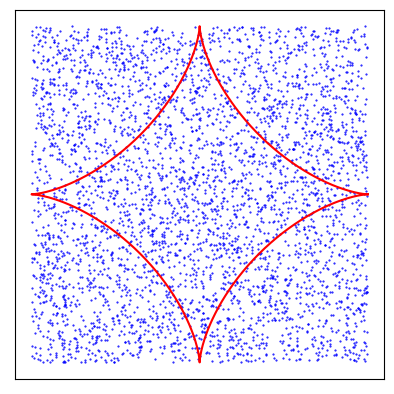
&emsp;试用这一方法求星形线 $x^{\frac23}+y^{\frac23}=1$所围区域面积的近似值。随机点数量不能少于10000. 提示：x,y分别取同样长度的一维随机数组。

In [40]:
import numpy as np

n = 100000
x = np.random.uniform(-1,1,n)
y = np.random.uniform(-1,1,n)
r = x**(2/3) + y**(2/3)   # r<=1则为星形线范围内的点
s = np.sum(r<=1)/n * 4    # np.sum(r<=1)表示区域内的点数
print('星形线所围区域面积约为：', s)

星形线所围区域面积约为： 0.29496


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12320\1529598470.py:6: RuntimeWarning: invalid value encountered in power
  r = x**(2/3) + y**(2/3)   # r<=1则为星形线范围内的点


In [34]:
# 以上的结果明显不正确，且出现了关于幂运算的警告
# 原因在于负数的非整数次幂将出现虚数，如下所示：

(-0.5)**(2/3)

(-0.31498026247371813+0.5455618179858608j)

In [11]:
# 以下先平方再1/3次方，不出现虚数运算
import numpy as np

n = 100000
x = np.random.uniform(-1,1,n)  
y = np.random.uniform(-1,1,n)
r = (x*x)**(1/3)+(y*y)**(1/3) <= 1    # r<=1则为星形线范围内的点
s = np.sum(r)/n * 4    # np.sum(r)表示区域内的点数
print('星形线所围区域面积约为：', s)

星形线所围区域面积约为： 1.18916


In [14]:
# 因对称性，只需考虑第一象限
import numpy as np

n = 100000
x = np.random.rand(n)  # 只考虑第一象限
y = np.random.rand(n)
r = x**(2/3)+y**(2/3) <= 1    # r<=1则为星形线范围内的点
s = np.sum(r)/n * 4    # np.sum(r<=1)表示区域内的点数
print('星形线所围区域面积约为：', s)

星形线所围区域面积约为： 1.1818


<font face='kaiti' size=5 style='line-height:1.5'>

8. （选做题）数值微分：已知函数$f(x)$在 $x_0, x_0+h, \cdots, x_0+(n-1)h,x_0+nh$ 处的函数值为 $y_0,y_1,\cdots,y_{n-1},y_n$，求各点处的导数值，有一个三点差分公式为：
    $$\begin{array}{l}f'(x_0)=\dfrac1{2h}(-3y_0+4y_1-y_2),\\ f'(x_k)=\dfrac1{2h}(y_{k+1}-y_{k-1}),\;k=1,\cdots,n-1,\\f'(x_n)=\dfrac1{2h}(y_{n-2}-4y_{n-1}+3y_n).\end{array}$$
&emsp;对函数$y=\dfrac{x^2}2, x\in[-2,2]$，以 $h=0.1$ 均匀取点，以三点公式求这些点（包含$x=-2$和$x=2$)处的导数值，并与真实值比较。    

In [17]:
import numpy as np

x0,xn,h = -2,2,0.1
x = np.arange(x0, xn+h, h)
y = x*x/2
dy_true = x  # 真实的导数值
dy = np.zeros_like(x) # 初始化
dy[0] = (-3*y[0]+4*y[1]-y[2])/2/h  # 左端点
dy[-1] = (y[-3]-4*y[-2]+3*y[-1])/2/h # 右端点
dy[1:-1] = (y[2:]-y[0:-2])/2/h # 中间点
print("数值微分的误差为：\n", dy-dy_true)

数值微分的误差为：
 [ 4.44089210e-16 -1.77635684e-15 -1.77635684e-15 -1.77635684e-15
 -1.77635684e-15 -1.11022302e-15 -1.11022302e-15 -6.66133815e-16
 -1.11022302e-15 -1.11022302e-15 -6.66133815e-16 -6.66133815e-16
 -7.77156117e-16 -7.77156117e-16 -4.44089210e-16 -3.88578059e-16
 -3.88578059e-16 -2.22044605e-16 -1.66533454e-16 -8.32667268e-17
  1.73472348e-18  9.71445147e-17  1.94289029e-16  2.22044605e-16
  2.77555756e-16  4.44089210e-16  5.55111512e-16  6.66133815e-16
  5.55111512e-16  6.66133815e-16  6.66133815e-16  8.88178420e-16
  1.55431223e-15  8.88178420e-16  8.88178420e-16  1.55431223e-15
  1.55431223e-15  1.55431223e-15  1.55431223e-15  1.55431223e-15
  2.66453526e-15]


<font face='kaiti' size=5 style='line-height:1.5'>

9. （选做题）复合辛普森公式求数值积分，其实质是在两个相邻的子区间上用2次插值函数近似原函数，对插值函数求积分当做是原函数的积分：考虑 $\displaystyle\int_a^b f(x)dx$，在$[a,b]$上等间隔取点，步长为$h$，子区间为2n个，即$x_0=a, x_1=a+h, \cdots, x_{2n}=b$。则 $$\int_a^b f(x)dx\approx \dfrac h3\left[f(a)+4\sum\limits_{k=0}^{n-1}f(2k+1)+2\sum\limits_{k=1}^{n-1}f(2k)+f(b)\right]$$
利用该方法求 $\displaystyle\int_0^{\pi}x \sin x\;\rm{dx}$ ，n取1000。其精确值为 $\pi.$

In [26]:
import numpy as np

a, b = 0, np.pi
n = 1000
h = (b-a)/2/n
x = np.linspace(a, b, 2*n+1)
f = x*np.sin(x)
f_int = f[0]+4*np.sum(f[1:-1:2])+2*np.sum(f[2:-2:2])+f[-1]
f_int = f_int * h/3
print('积分近似值为：', f_int)

积分近似值为： 3.1415926535898997


In [27]:
# scipy中积分模块中提供了辛普森公式求积分的函数
from scipy.integrate import simps

a, b = 0, np.pi
n = 1000
x = np.linspace(a, b, 2*n+1)
f = x*np.sin(x)
f_int = simps(f, x)
print('积分近似值为：', f_int)

积分近似值为： 3.1415926535898993


<font face='kaiti' size=5 style='line-height:1.5'>

10. （选做题）牛顿法求平方根 $\sqrt{C}$ 的迭代公式为 $x_{k+1}=\dfrac12(x_k+\dfrac{C}{x_k}).$ 这里迭代停止的条件是 $|x_{k+1}-x_k|<10^{-8}$，初始值可以取1。试建立一个函数 sqroots(x)，能对一个数组x中的所有值，使用该公式求平方根。再利用这个函数求$[2,10]$上所有整数的平方根，并与Numpy中的函数sqrt()的结果比较。

In [31]:
import numpy as np

def sqroots(x, tol=1e-8):
    C = np.array(x, dtype=float)
    x0 = np.ones_like(C)  # 初始值
    while True: 
        x1 = (x0 + C/x0)/2
        flag = np.abs(x1-x0)>=tol # flag为True则继续迭代
        if sum(flag)==0:
            return x1
        x0[flag] = x1[flag]  # 只对不满足停止条件的进行更新
        
C = range(2,11)
sq = sqroots(C)
print('[2,10]上整数的平方根为：\n', sq)
print('与numpy.sqrt()的差异为：\n', np.sqrt(C)-sq)

[2,10]上整数的平方根为：
 [1.41421356 1.73205081 2.         2.23606798 2.44948974 2.64575131
 2.82842712 3.         3.16227766]
与numpy.sqrt()的差异为：
 [2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.44089210e-16 0.00000000e+00
 4.44089210e-16]
